## KNN 예: 분류

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
# 학습용 데이터(기존 개체)
X_train = np.array([[25, 25],
           [33, 30],
           [38, 30],
           [45, 35],
           [28, 40]])
# 라벨 
y_train = np.array([0, 0, 1, 1, 0])

In [ ]:
# 테스트용 데이터(새로운 개체) 
X_test = np.array([[30, 35]])

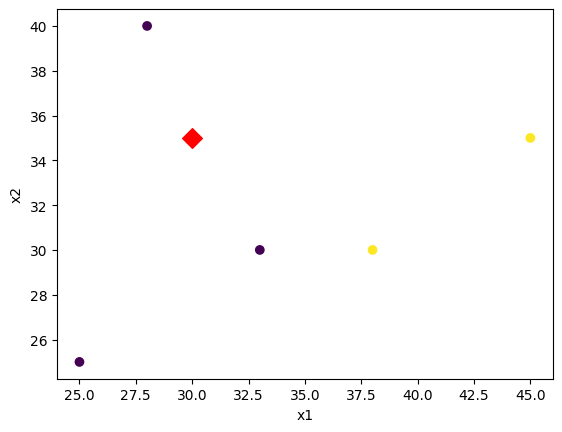

In [ ]:
# 산포도 그래프
# 학습 데이터 
plt.scatter(X_train[:, 0],  X_train[:, 1], c=y_train)       # c는 color

# 테스트 데이터
plt.scatter(X_test[:, 0],  X_test[:, 1], c='red', marker = 'D', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show() 

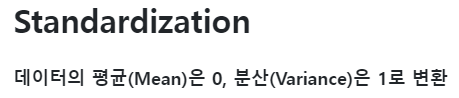

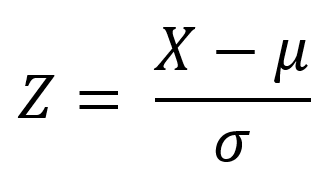

In [ ]:
# 피처 스케일링: 학습 데이터 
scalerX = StandardScaler()          # 표준화 스케일러 객체 생성
scalerX.fit(X_train)                # 표준화 스케일러를 이용한 학습용 데이터에 맞춤
X_train_std = scalerX.transform(X_train)    # 학습용 데이터 표준화
print(X_train_std)

[[-1.23272999 -1.37281295]
 [-0.11206636 -0.39223227]
 [ 0.58834841 -0.39223227]
 [ 1.56892908  0.58834841]
 [-0.81248113  1.56892908]]


In [ ]:
# 피처 스케일링: 테스트용 데이터 
X_test_std = scalerX.transform(X_test)
print(X_test_std)

[[-0.53231522  0.58834841]]


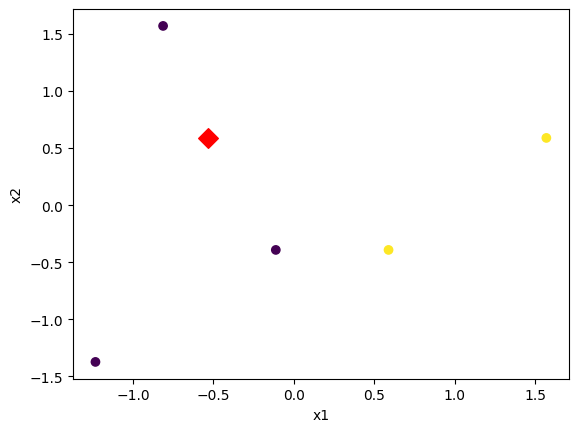

In [ ]:
# 산포도 (스케일된 데이터)
plt.scatter(X_train_std[:, 0],  X_train_std[:, 1], c=y_train)       # c는 color

plt.scatter(X_test_std[:, 0],  X_test_std[:, 1], c='red', marker = 'D', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show() 

In [ ]:
# 모형화 및 학습 
knn = KNeighborsClassifier(n_neighbors = 3, metric='euclidean')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
# 예측 
# predict: 예측한 클래스 반환
pred = knn.predict(X_test_std)
print(pred)

[0]


In [ ]:
# 클래스 별 확률 값을 반환
knn.predict_proba(X_test_std)

array([[0.66666667, 0.33333333]])

In [ ]:
# 인접한 k개의 sample에 대해 거리, index를 반환
dist, index = knn.kneighbors(X_test_std)
print(dist)
print(index) 

[[1.0198193  1.06683999 1.48910222]]
[[4 1 2]]


## KNN 예: 회귀

In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# 학습용 데이터 
X_train = np.array([[25, 25],
           [33, 30],
           [38, 30],
           [45, 35],
           [28, 40]])
# 라벨 
y_train = np.array([[10], [20], [30], [40], [50]])

In [3]:
# 테스트용 데이터
X_test = np.array([[30, 35]])

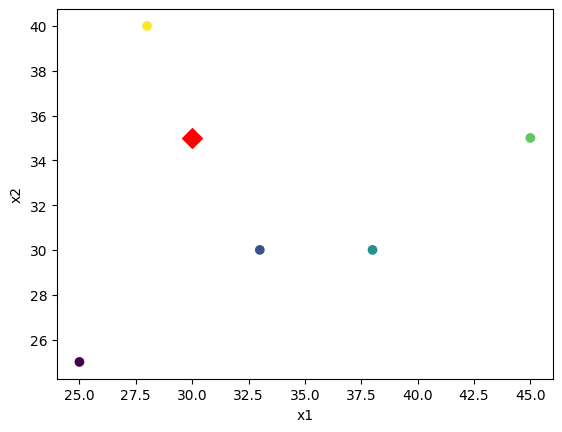

In [4]:
# 산포도 
# 학습용 데이터 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train) 
# 테스트용 데이터
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', marker = 'D', s=100)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show() 

In [5]:
# 피처 스케일링: 학습용 데이터 
# 입력 값
scalerX = StandardScaler()
scalerX.fit(X_train)
X_train_std = scalerX.transform(X_train)
print(X_train_std)

# 목표 값 
scalerY = StandardScaler()
scalerY.fit(y_train)
y_train_std = scalerY.transform(y_train)
print(y_train_std)

[[-1.23272999 -1.37281295]
 [-0.11206636 -0.39223227]
 [ 0.58834841 -0.39223227]
 [ 1.56892908  0.58834841]
 [-0.81248113  1.56892908]]
[[-1.41421356]
 [-0.70710678]
 [ 0.        ]
 [ 0.70710678]
 [ 1.41421356]]


In [6]:
# 피처 스케일링: 테스트용 데이터 
X_test_std = scalerX.transform(X_test)
print(X_test_std)

[[-0.53231522  0.58834841]]


In [7]:
# 모형화 
knn = KNeighborsRegressor(n_neighbors = 3, metric='euclidean', weights="uniform")
# 학습
knn.fit(X_train_std, y_train_std)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [8]:
# 예측 
y_pred = knn.predict(X_test_std)
print(y_pred)

[[0.23570226]]


In [9]:
# 예측 값의 역변환
y_pred_inverse = scalerY.inverse_transform(y_pred)
print(y_pred_inverse)

[[33.33333333]]
